In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chapter 1 Reading Data

The CSV file is not properly formatted. Pandas has trouble reading it.

In [2]:
broken_df = pd.read_csv('../data/bikes.csv', encoding='ISO-8859-1')
broken_df[:3]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


In [3]:
fixed_df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


Index into column returns a series. The series can be converted into numpy array.

In [4]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
              ... 
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
2012-11-05    2247
Name: Berri 1, Length: 310, dtype: int64

In [5]:
fixed_df['Berri 1'].to_numpy().shape

(310,)

Interally, `Series` is a `numpy` array.

In [6]:
fixed_df['Berri 1'].values.shape

(310,)

`Series` also has indices.

In [7]:
for index, val in fixed_df['Berri 1'][:10].items():
    print(index, val)

2012-01-01 00:00:00 35
2012-01-02 00:00:00 83
2012-01-03 00:00:00 135
2012-01-04 00:00:00 144
2012-01-05 00:00:00 197
2012-01-06 00:00:00 146
2012-01-07 00:00:00 98
2012-01-08 00:00:00 95
2012-01-09 00:00:00 244
2012-01-10 00:00:00 397


Plotting a column will automatically select index column as the x-axis.

<AxesSubplot:xlabel='Date'>

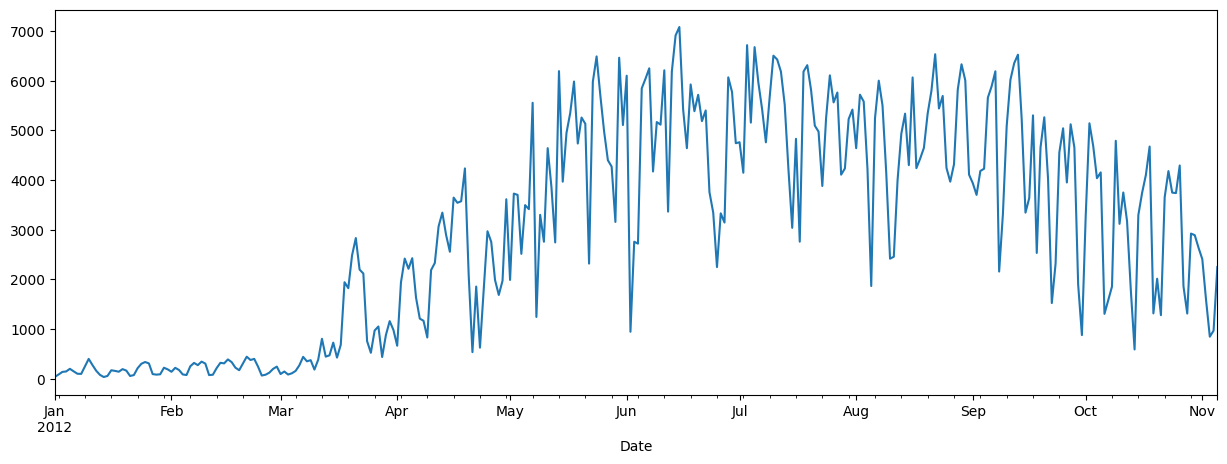

In [8]:
fixed_df['Berri 1'].plot(figsize=(15, 5))

## Series vs DataFrame

1. Dimensionality
  - Series is 1-dimensional labeled array. All data are of the same data type.
  - DataFrame is 2-dimensional labeled data structure with columns that can be of different types.
2. Indexing
  - Series has as single index, usually integer.
  - DataFrame has row and column index and it usually starts with indexing into column name and then integer for entry.
3. Functionality
  - Series has limited functionality because it's just a vector of a single data type.
  - DataFrame offers aggregation, join, reshape, and bunch of other functionalities like a SQL table.

In [9]:
fixed_df['Berri 1'][-10:-1]

Date
2012-10-27    1857
2012-10-28    1310
2012-10-29    2919
2012-10-30    2887
2012-10-31    2634
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
Name: Berri 1, dtype: int64

# Chapter 2 Querying Data Frequency Part 1

In [10]:
complaints_df = pd.read_csv('../data/311-service-requests.csv', dtype='unicode')
complaints_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


There are a lot of complaints.

In [11]:
complaints_df['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

In [12]:
complaints_df[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


We can observe the frequency of each complaint.

In [13]:
complaints_df['Complaint Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint Type, Length: 165, dtype: int64

We can observe the frequency of complaint with respect to location.

In [14]:
complaints_df[['Complaint Type', 'Borough']].value_counts()

Complaint Type                        Borough    
DOF Literature Request                Unspecified    5797
HEATING                               BROOKLYN       4548
                                      BRONX          4093
                                      MANHATTAN      3494
GENERAL CONSTRUCTION                  BROOKLYN       2791
                                                     ... 
Stalled Sites                         QUEENS            1
Collection Truck Noise                QUEENS            1
Special Natural Area District (SNAD)  BRONX             1
Panhandling                           BROOKLYN          1
X-Ray Machine/Equipment               QUEENS            1
Length: 638, dtype: int64

Series comes with `MultiIndex` which can be unpacked using `items()`. Each item provides index and value. In this case, the index is multi-index so it can be de-constructed into two values.

In [15]:
for index, value in complaints_df[['Complaint Type', 'Borough']].value_counts()[:10].items():
    complaint, borough = index
    print(complaint, borough, value)

DOF Literature Request Unspecified 5797
HEATING BROOKLYN 4548
HEATING BRONX 4093
HEATING MANHATTAN 3494
GENERAL CONSTRUCTION BROOKLYN 2791
GENERAL CONSTRUCTION BRONX 2273
Street Light Condition QUEENS 2122
PLUMBING BROOKLYN 2017
Street Light Condition BROOKLYN 1956
HEATING QUEENS 1896


<AxesSubplot:xlabel='Complaint Type,Borough'>

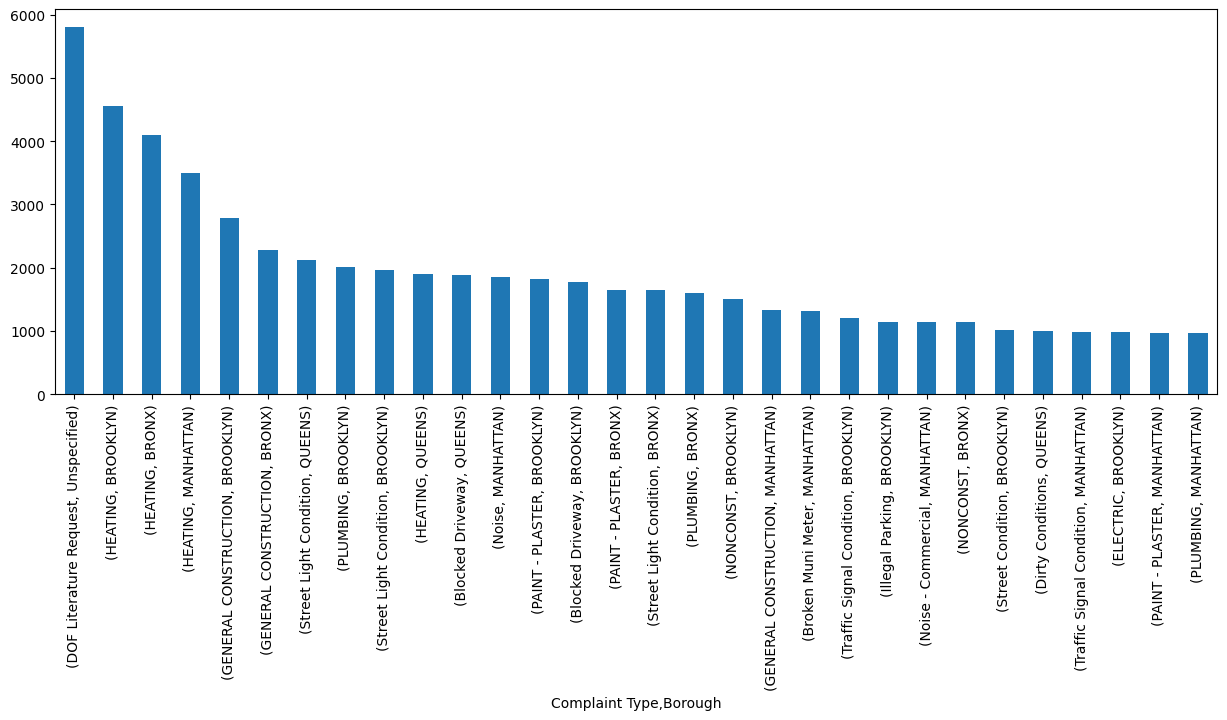

In [16]:
complaints_df[['Complaint Type', 'Borough']].value_counts()[:30].plot(kind='bar', figsize=(15, 5))

# Chapter 3 Query Data Frequency Part 2

I want to rename the columns to make it easier to understand.

In [17]:
complaints_df = pd.read_csv('../data/311-service-requests.csv', dtype='unicode', index_col='Unique Key')
complaints_df = complaints_df.rename(columns={"Borough": "Neighborhood"})
complaints_df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Neighborhood',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 

Select only noise complaints, using syntax similar to that of `numpy`.

In [18]:
noise_df = complaints_df[complaints_df['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63618202176914,-74.1161500428337,"(40.63618202176914, -74.1161500428337)"
26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.55342078716953,-74.19674315017886,"(40.55342078716953, -74.19674315017886)"
26594085,10/31/2013 12:32:08 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026,121 WEST 116 STREET,WEST 116 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80238950799943,-73.95052644123253,"(40.80238950799943, -73.95052644123253)"
26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634103775951736,-73.91105541883589,"(40.634103775951736, -73.91105541883589)"


We can compose multiple filters.

In [19]:
is_noise = complaints_df['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints_df['Neighborhood'] == "BROOKLYN"
complaints_df[is_noise & in_brooklyn][:5]

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634103775951736,-73.91105541883589,"(40.634103775951736, -73.91105541883589)"
26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6617931276793,-73.95993363978067,"(40.6617931276793, -73.95993363978067)"
26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724599563793525,-73.95427134534344,"(40.724599563793525, -73.95427134534344)"
26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63616876563881,-73.97245504682485,"(40.63616876563881, -73.97245504682485)"
26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6429222774404,-73.97876175474585,"(40.6429222774404, -73.97876175474585)"


There are too many columns. Let's just look at few.

In [20]:
complaints_df[is_noise & in_brooklyn][['Complaint Type', 'Neighborhood', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Neighborhood,Created Date,Descriptor
Unique Key,,,,
26595564,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
26595553,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
26594653,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
26591992,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
26594167,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
26590110,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
26595791,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
26593754,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
26582351,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking


## Aggregation: Which neighborhood has the most noise complaints?

In [21]:
is_noise = complaints_df['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints_df[is_noise]
noise_complaint_counts = noise_complaints['Neighborhood'].value_counts()
noise_complaint_counts

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Neighborhood, dtype: int64

In [22]:
all_complaint_counts = complaints_df['Neighborhood'].value_counts()
all_complaint_counts

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Neighborhood, dtype: int64

We can look at the ratio of noise complaints compared to all complaints.

In [23]:
noise_complaint_counts / all_complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Neighborhood, dtype: float64

In [24]:
f"{(noise_complaint_counts / all_complaint_counts)['MANHATTAN'] * 100:0.2f}% of all complaints in Manhattan are noise related."

'3.78% of all complaints in Manhattan are noise related.'

<AxesSubplot:>

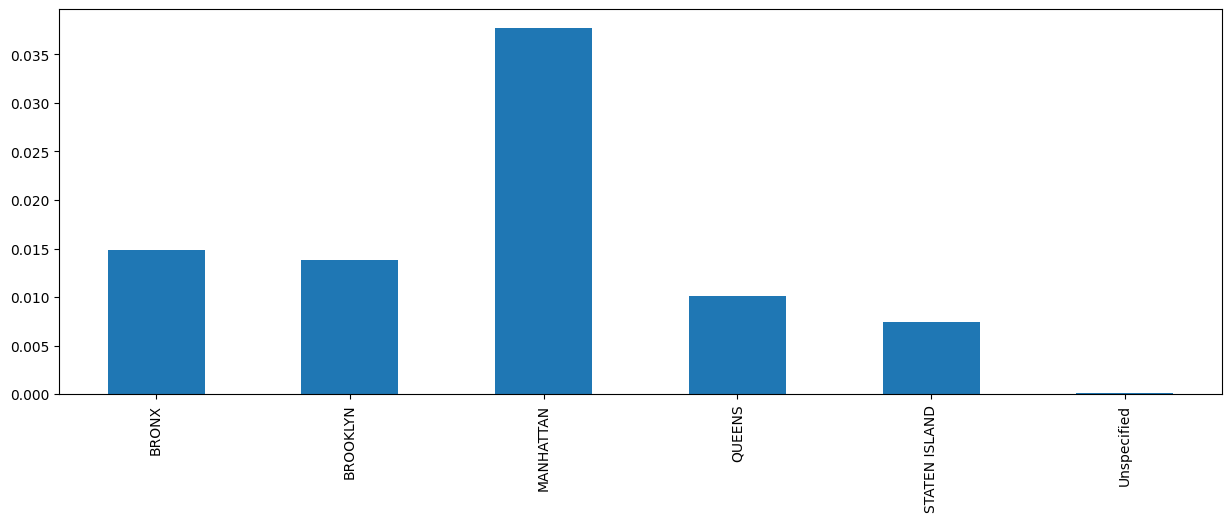

In [25]:
(noise_complaint_counts / all_complaint_counts).plot(kind='bar', figsize=(15, 5))

# Chapter 4 Groupby and Aggregation

<AxesSubplot:xlabel='Date'>

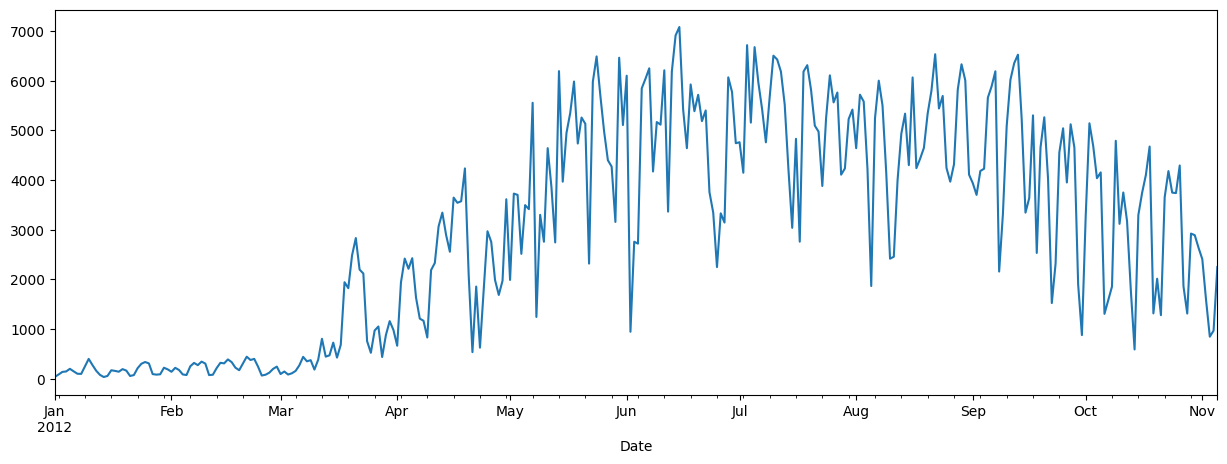

In [26]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot(figsize=(15, 5))

In [27]:
bikes.columns

Index(['Berri 1', 'Brébeuf (données non disponibles)', 'Côte-Sainte-Catherine',
       'Maisonneuve 1', 'Maisonneuve 2', 'du Parc', 'Pierre-Dupuy', 'Rachel1',
       'St-Urbain (données non disponibles)'],
      dtype='object')

Apparently Berri 1 is a street name. The data represents how many meters are biked on the street.

In [28]:
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


We index by date but we can convert it to day of the year or week day.

In [29]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [30]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

In [31]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

Add a new week day column to the `DataFrame`. There are many ways to do it. I will just declare a new list as a column.

In [32]:
berri_bikes['weekday'] = berri_bikes.index.weekday
berri_bikes

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3
...,...,...
2012-11-01,2405,3
2012-11-02,1582,4
2012-11-03,844,5


Aggregate all the biked meters by weekday.

In [33]:
weekday_counts = berri_bikes.value_counts().groupby('weekday').aggregate(np.sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

Monday       45
Tuesday      44
Wednesday    44
Thursday     44
Friday       44
Saturday     44
Sunday       45
dtype: int64

In [34]:
weekday_sums = berri_bikes.groupby('weekday').aggregate(np.sum)
weekday_sums.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sums

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


<AxesSubplot:>

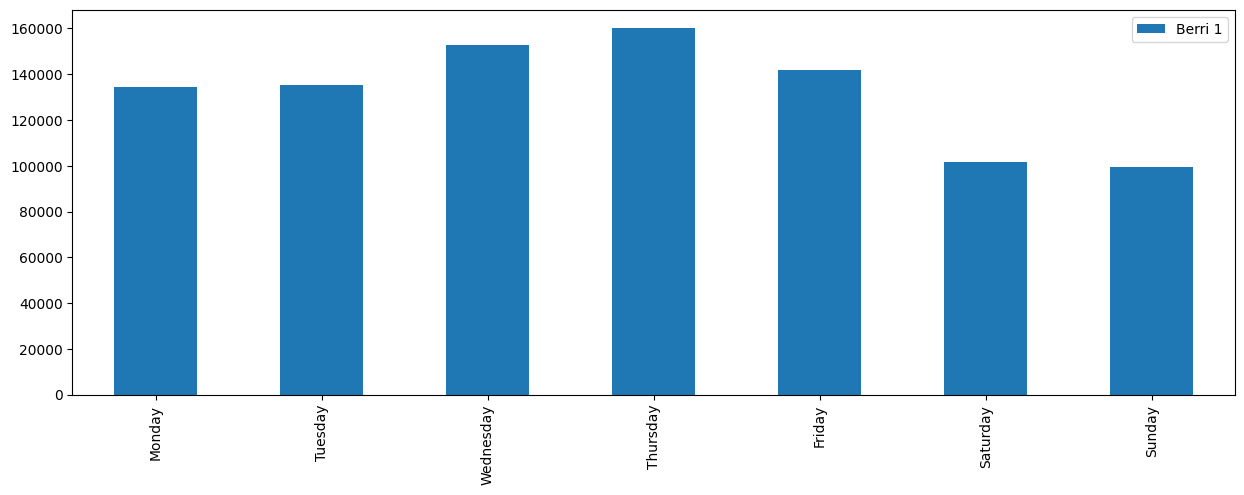

In [35]:
weekday_sums.plot(kind='bar', figsize=(15,5))

In [36]:
weekday_means = berri_bikes.groupby('weekday').aggregate(np.mean)
weekday_means.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_means

,Berri 1
Monday,2984.400000
Tuesday,3075.113636
Wednesday,3476.636364
Thursday,3639.340909
Friday,3222.068182
Saturday,2308.590909
Sunday,2206.888889


<AxesSubplot:>

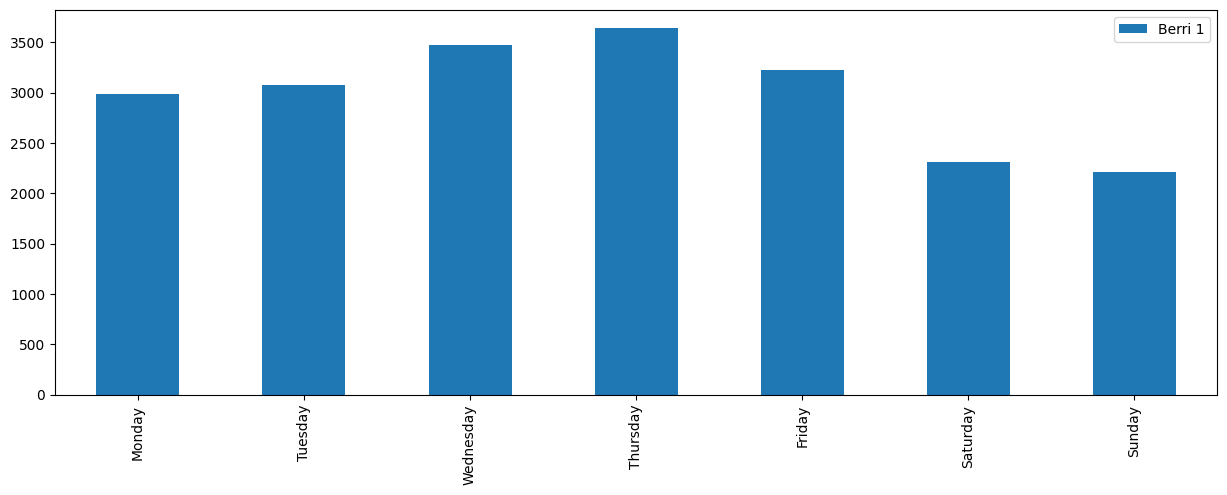

In [37]:
weekday_means.plot(kind='bar', figsize=(15,5))

# Chapter 5 Scraping Data (Nevermind, URL is broken)

In [40]:
weather_2012 = pd.read_csv('../data/weather_2012.csv', index_col='Date/Time')
weather_2012.columns

Index(['Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

<AxesSubplot:xlabel='Date/Time'>

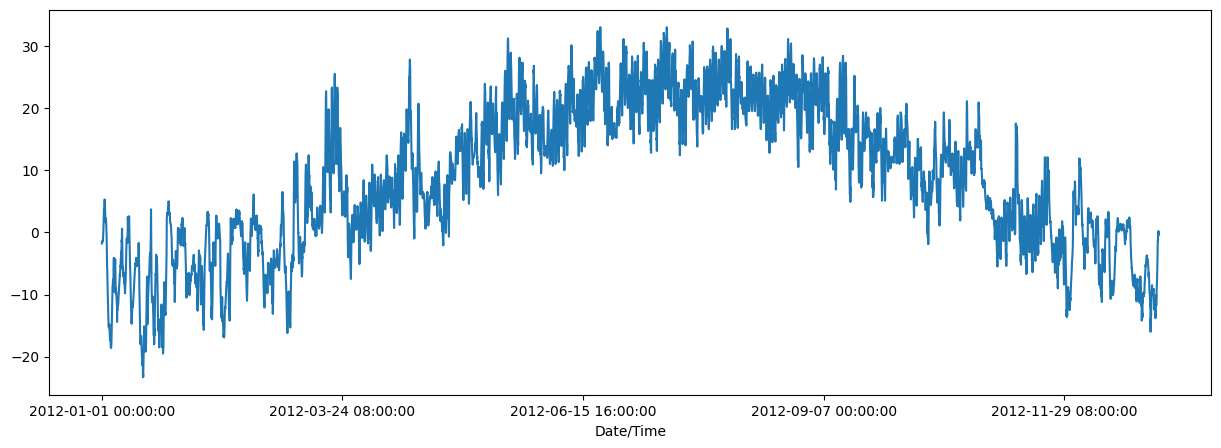

In [42]:
weather_2012['Temp (C)'].plot(figsize=(15, 5))

# Chapter 6 String Operations

In [43]:
weather_2012 = pd.read_csv('../data/weather_2012.csv', index_col='Date/Time', parse_dates=True)
weather_2012.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


We can operate on a string `Series`. It has its own API.

In [47]:
weather_descriptions = weather_2012['Weather']
is_snowing = weather_descriptions.str.contains('Snow')
is_snowing

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
                       ...  
2012-12-31 19:00:00     True
2012-12-31 20:00:00     True
2012-12-31 21:00:00     True
2012-12-31 22:00:00     True
2012-12-31 23:00:00     True
Name: Weather, Length: 8784, dtype: bool

<AxesSubplot:xlabel='Date/Time'>

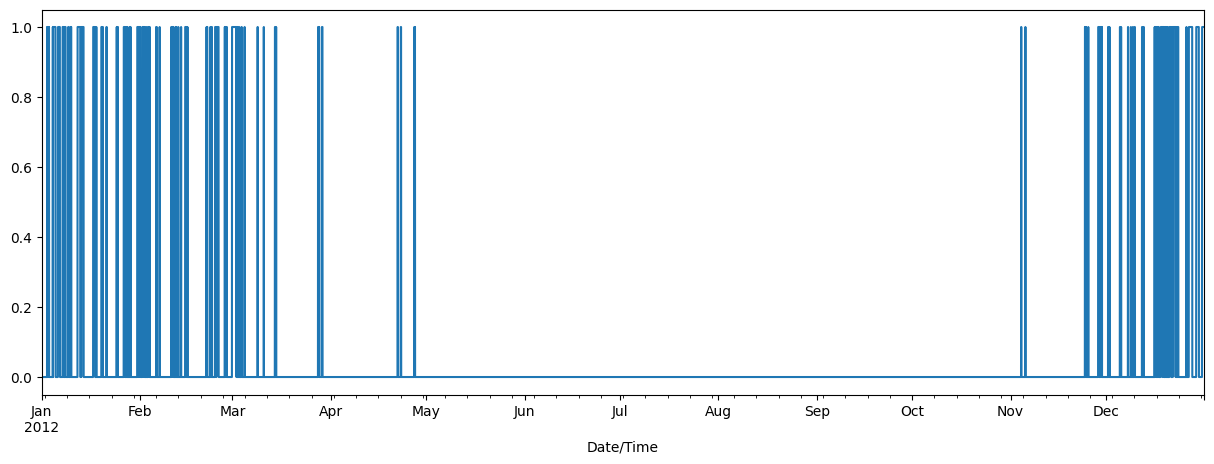

In [50]:
is_snowing.astype(float).plot(figsize=(15, 5))

Resampling based on `M` which means month. I apply a median function so the resampled range will compute a median value.

In [55]:
weather_2012['Temp (C)'].resample('M').apply(np.median)

Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
2012-06-30    19.60
2012-07-31    22.90
2012-08-31    22.20
2012-09-30    16.10
2012-10-31    11.30
2012-11-30     1.05
2012-12-31    -2.85
Freq: M, Name: Temp (C), dtype: float64

<AxesSubplot:xlabel='Date/Time'>

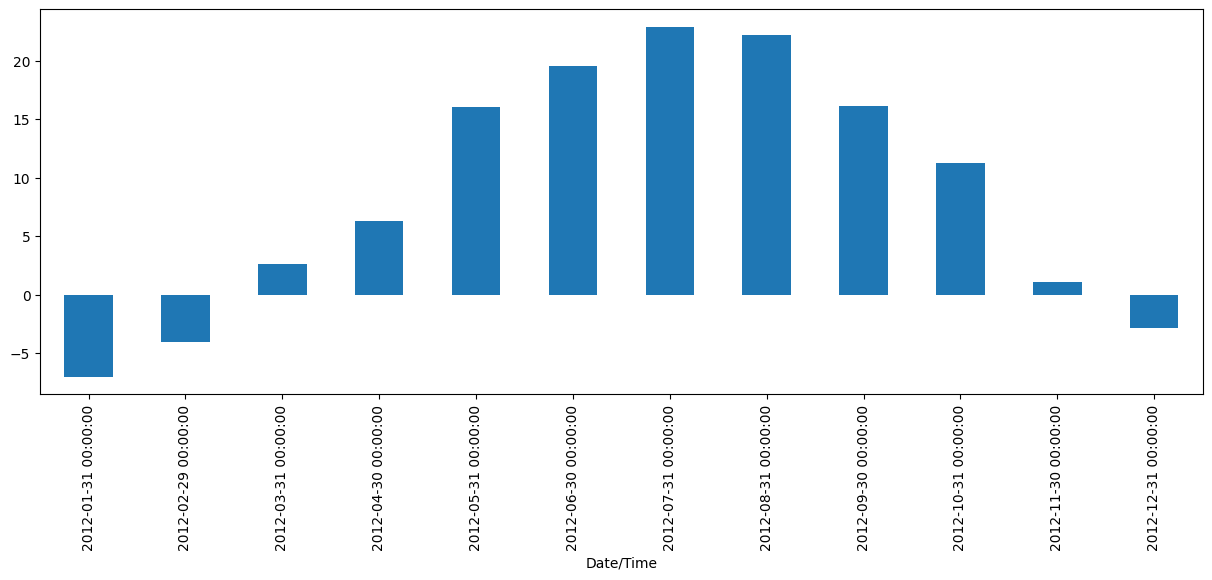

In [56]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar', figsize=(15,5))

I can also compute mean.

<AxesSubplot:xlabel='Date/Time'>

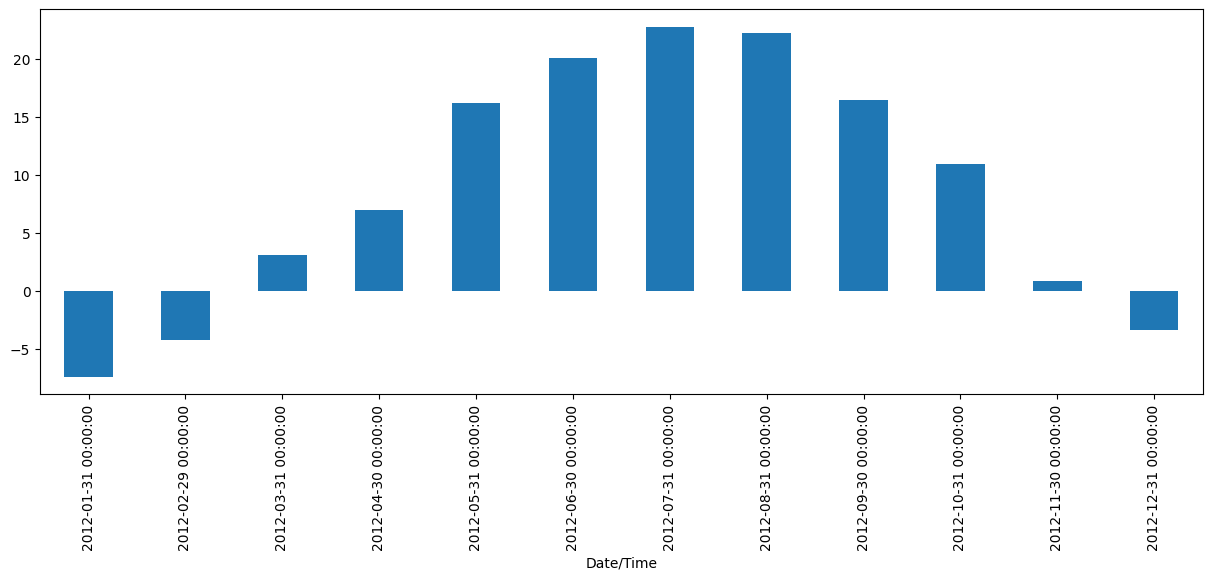

In [57]:
weather_2012['Temp (C)'].resample('M').apply(np.mean).plot(kind='bar', figsize=(15,5))

Now I want to find the percentage of time each month was snowing.

<AxesSubplot:xlabel='Date/Time'>

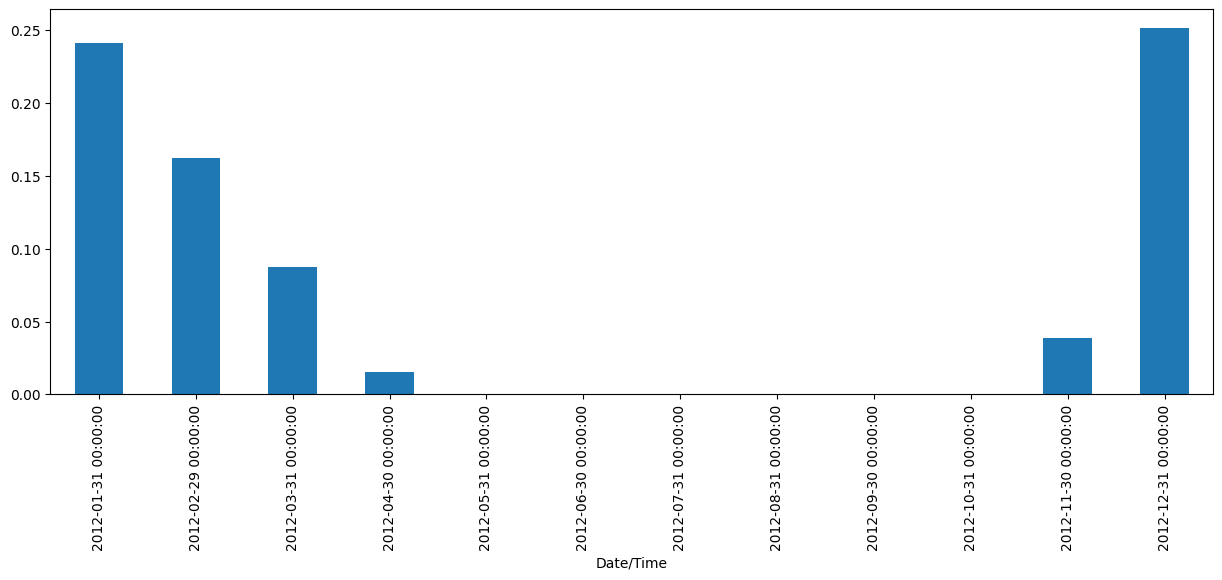

In [58]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar', figsize=(15,5))

Combine the median temperature of each month with snowiness.

In [59]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

temperature.name = 'Temperature'
snowiness.name = 'Snowiness'

# Concatenate two series to form a new DataFrame.
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


array([<AxesSubplot:title={'center':'Temperature'}, xlabel='Date/Time'>,
       <AxesSubplot:title={'center':'Snowiness'}, xlabel='Date/Time'>],
      dtype=object)

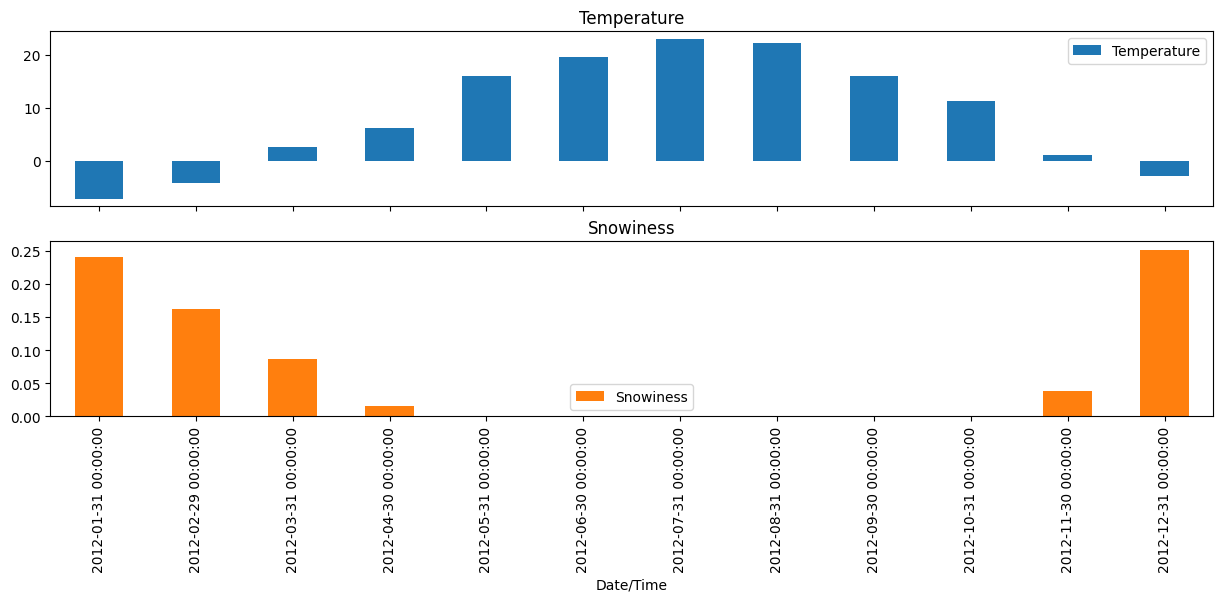

In [60]:
stats.plot(kind='bar', subplots=True, figsize=(15, 5))

# Chapter 7 Clean-up Data

The zip code from data frame contains strings but the strings are representing various different type of values. I need to clean it up.

In [92]:
requests = pd.read_csv('../data/311-service-requests.csv', dtype='unicode')
requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [91]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [63]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('../data/311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

Some zip codes contain dashes. I'd prefer to remove the values after dashes.

In [64]:
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'][long_zip_codes].unique()

array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

In [65]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

Now everything should be 5-digit zip code.

In [66]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

What are the 00000 zip code?

In [67]:
requests[requests['Incident Zip'] == '00000']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
42600,26529313,10/22/2013 02:51:06 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,00000,EWR EWR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60843,26507389,10/17/2013 05:48:44 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,00000,1 NEWARK AIRPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Okay they are useless.

In [72]:
zero_zips = requests['Incident Zip'] == '00000'
requests['Incident Zip'][zero_zips] = np.nan

/tmp/ipykernel_69472/921089100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests['Incident Zip'][zero_zips] = np.nan


I have to use `iloc` to modify the value.

In [73]:
requests.loc[zero_zips, 'Incident Zip'] = np.nan

In [76]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

`loc`
- Used for label based indexing.
- The labels refer to row and column names.
- It can accept boolean data to filter rows.
- Slicing using `loc` is inclusive of the stop label.
- Can set values for rows or columns that do not exist, thereby expanding the DataFrame.

In [81]:
requests.loc[0:10, 'Incident Zip']

0     11432
1     11378
2     10032
3     10023
4     10027
5     11372
6     11419
7     11417
8     10011
9     11225
10    11218
Name: Incident Zip, dtype: object

`iloc`
- Used for integer based indexing.
- The indexing is based on integer index positions.
- It only takes integers.
- Slicing using `iloc` i similar to Python lists, exlcusive of the stop integer.
- You cannot expand DataFrame using `iloc`.

In [86]:
requests.iloc[0:10, -3:]

,Latitude,Longitude,Location
0,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
8,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"
9,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"


Now let's find the incidents with zip code not starting 0 or 1.

In [97]:
zips = requests['Incident Zip']
is_close = zips.str.startswith('0') | zips.str.startswith('1')
is_far = ~(is_close) & zips.notnull()
zips[is_far]

12102         77056
13450         70711
29136    77092-2016
30939    55164-0737
43290       NO CLUE
44008         90010
47048         23541
57636         92123
71001         92123
71834         23502
80573         61702
85821    29616-0759
89304    35209-3114
94201         41042
Name: Incident Zip, dtype: object

In [100]:
requests[is_far][['Incident Zip', 'Descriptor', 'City']].sort_values('Incident Zip')

,Incident Zip,Descriptor,City
71834,23502,Harassment,NORFOLK
47048,23541,Harassment,NORFOLK
85821,29616-0759,Debt Not Owed,GREENVILLE
89304,35209-3114,Harassment,BIRMINGHAM
94201,41042,Harassment,FLORENCE
30939,55164-0737,Harassment,ST. PAUL
80573,61702,Billing Dispute,BLOOMIGTON
13450,70711,Contract Dispute,CLIFTON
12102,77056,Debt Not Owed,HOUSTON
29136,77092-2016,False Advertising,HOUSTON


Try to look at cities.

In [101]:
requests['City'].str.upper().value_counts()

BROOKLYN          31662
NEW YORK          22664
BRONX             18438
STATEN ISLAND      4766
JAMAICA            2246
                  ...  
BELLEVILLE            1
WOODBURY              1
BOHIEMA               1
CENTRAL ISLIP         1
NEWARK AIRPORT        1
Name: City, Length: 100, dtype: int64

# Chapter 8 Parse Timestamps

In [107]:
popcon = pd.read_csv('../data/popularity-contest', sep=' ', )[:-1]
popcon.columns = ['atime', 'ctime', 'package-name', 'mru-program', 'tag']
popcon.head()

,atime,ctime,package-name,mru-program,tag
0,1387295797,1367633260,perl-base,/usr/bin/perl,NaN
1,1387295796,1354370480,login,/bin/su,NaN
2,1387295743,1354341275,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,1387295743,1387224204,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,1387295742,1354341253,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


In [108]:
popcon['atime'].dtype

dtype('O')

Let's convert these timestamps to integers.

In [109]:
popcon['atime'] = popcon['atime'].astype(int)
popcon['ctime'] = popcon['ctime'].astype(int)
popcon['atime'].dtype

dtype('int64')

Then convert them to date time.

In [110]:
popcon['atime'] = pd.to_datetime(popcon['atime'], unit='s')
popcon['ctime'] = pd.to_datetime(popcon['ctime'], unit='s')

In [111]:
popcon['atime'].dtype

dtype('<M8[ns]')

In [112]:
popcon[:5]

,atime,ctime,package-name,mru-program,tag
0,2013-12-17 15:56:37,2013-05-04 02:07:40,perl-base,/usr/bin/perl,NaN
1,2013-12-17 15:56:36,2012-12-01 14:01:20,login,/bin/su,NaN
2,2013-12-17 15:55:43,2012-12-01 05:54:35,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,2013-12-17 15:55:43,2013-12-16 20:03:24,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,2013-12-17 15:55:42,2012-12-01 05:54:13,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


Now we can use timestamp comparison.

In [113]:
popcon = popcon[popcon['atime'] > '1970-01-01']
popcon

,atime,ctime,package-name,mru-program,tag
0,2013-12-17 15:56:37,2013-05-04 02:07:40,perl-base,/usr/bin/perl,NaN
1,2013-12-17 15:56:36,2012-12-01 14:01:20,login,/bin/su,NaN
2,2013-12-17 15:55:43,2012-12-01 05:54:35,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,2013-12-17 15:55:43,2013-12-16 20:03:24,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,2013-12-17 15:55:42,2012-12-01 05:54:13,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN
...,...,...,...,...,...
2093,2010-10-15 16:41:50,2012-12-01 05:54:37,pptp-linux,/usr/sbin/pptp,<OLD>
2094,2010-06-08 10:06:29,2012-12-01 05:54:57,libfile-basedir-perl,/usr/share/perl5/File/BaseDir.pm,<OLD>
2095,2010-03-06 14:44:18,2012-12-01 05:54:37,laptop-detect,/usr/sbin/laptop-detect,<OLD>
2096,2010-02-22 14:59:21,2012-12-01 05:54:14,libfribidi0,/usr/bin/fribidi,<OLD>


We can also sort the timestamps to get most recent packages.

In [115]:
nonlibraries = popcon[~popcon['package-name'].str.contains('lib')]
nonlibraries.sort_values('ctime', ascending=False)[:10]

,atime,ctime,package-name,mru-program,tag
57,2013-12-17 04:55:39,2013-12-17 04:55:42,ddd,/usr/bin/ddd,<RECENT-CTIME>
450,2013-12-16 20:03:20,2013-12-16 20:05:13,nodejs,/usr/bin/npm,<RECENT-CTIME>
454,2013-12-16 20:03:20,2013-12-16 20:05:04,switchboard-plug-keyboard,/usr/lib/plugs/pantheon/keyboard/options.txt,<RECENT-CTIME>
445,2013-12-16 20:03:20,2013-12-16 20:05:04,thunderbird-locale-en,/usr/lib/thunderbird-addons/extensions/langpac...,<RECENT-CTIME>
396,2013-12-16 20:08:27,2013-12-16 20:05:03,software-center,/usr/sbin/update-software-center,<RECENT-CTIME>
449,2013-12-16 20:03:20,2013-12-16 20:05:00,samba-common-bin,/usr/bin/net.samba3,<RECENT-CTIME>
397,2013-12-16 20:08:25,2013-12-16 20:04:59,postgresql-client-9.1,/usr/lib/postgresql/9.1/bin/psql,<RECENT-CTIME>
398,2013-12-16 20:08:23,2013-12-16 20:04:58,postgresql-9.1,/usr/lib/postgresql/9.1/bin/postmaster,<RECENT-CTIME>
452,2013-12-16 20:03:20,2013-12-16 20:04:55,php5-dev,/usr/include/php5/main/snprintf.h,<RECENT-CTIME>
440,2013-12-16 20:03:20,2013-12-16 20:04:54,php-pear,/usr/share/php/XML/Util.php,<RECENT-CTIME>
